In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv', parse_dates=['03', '04'])
df_test = pd.read_csv('test.csv', parse_dates=['03', '04'])

print(df_train.shape)
print(df_test.shape)

(55760, 21)
(13940, 20)


In [3]:
# After loading the dataset, map the column names into a human understandable format
column_mapping = {
    'id': 'customer_id',
    '02': 'gender', 
    '03': 'dob', 
    '04': 'lead_creation_date', 
    '05': 'city_code', 
    '06': 'area_code', 
    '07': 'employer_code', 
    '08': 'employer_category1', 
    '09': 'employer_category2', 
    '10': 'monthly_income', 
    '11': 'bank_code', 
    '12': 'bank_acc_type',
    '13': 'marketing_source', 
    '14': 'marketing_category1', 
    '15': 'marketing_category2', 
    '16': 'current_loan_installment', 
    '17': 'requested_loan_amount', 
    '18': 'loan_repayment', 
    '19': 'interest_rate', 
    '20': 'requested_loan_installment', 
    'class': 'loan_approval_status'
}

df_train = df_train.rename(columns=column_mapping)
df_test = df_test.rename(columns=column_mapping)

In [4]:
df_train.head()

,customer_id,gender,dob,lead_creation_date,city_code,area_code,employer_code,employer_category1,employer_category2,monthly_income,...,bank_acc_type,marketing_source,marketing_category1,marketing_category2,current_loan_installment,requested_loan_amount,loan_repayment,interest_rate,requested_loan_installment,loan_approval_status
0,-2267620335683202440,0,1992-08-19,2016-07-26,4195062457429987311,1.0,5451653042631526903,2.0,4.0,2415.0,...,2.0,5,3,4,0.00,40950.0,5.0,NaN,0.00,0
1,6983777496993703358,1,1975-03-17,2016-02-14,-6228735452334436716,3.0,8322794614403,NaN,NaN,2625.0,...,NaN,1,7,0,0.00,NaN,NaN,NaN,0.00,0
2,-9000875829172115247,1,1983-04-07,2016-07-27,4195062457429987311,1.0,7958738730440449375,2.0,4.0,6772.5,...,1.0,4,2,10,2063.04,21000.0,5.0,15.19,2063.04,0
3,4577133526371079450,0,1975-01-23,2016-08-23,630300624900511972,1.0,-5322077886952523742,1.0,3.0,7980.0,...,1.0,4,2,10,1575.00,NaN,NaN,NaN,1575.00,0
4,5683986052858780477,0,1994-06-27,2016-07-21,4195062457429987311,1.0,-974246632625402816,2.0,4.0,945.0,...,1.0,4,3,0,0.00,NaN,NaN,NaN,0.00,0


In [5]:
df_test.head()

,customer_id,gender,dob,lead_creation_date,city_code,area_code,employer_code,employer_category1,employer_category2,monthly_income,bank_code,bank_acc_type,marketing_source,marketing_category1,marketing_category2,current_loan_installment,requested_loan_amount,loan_repayment,interest_rate,requested_loan_installment
0,4994603093964685097,1,1976-05-28,2016-08-27,5969016085647965848,3.0,-1583851805195383176,1.0,4.0,1155.0,-4438975989796485538,2.0,4,2,2,176.925,10500.0,4.0,34.79,176.925
1,6719898245964184851,1,1986-05-22,2016-06-12,3466152762937442713,1.0,3291646035407655386,2.0,4.0,3150.0,-5682066992016760665,1.0,1,2,10,1155.000,34650.0,4.0,NaN,1155.000
2,1194292741480147233,1,1992-09-24,2016-10-13,-5413728021433296369,1.0,-5282084624191443479,1.0,4.0,2310.0,4934588897315644940,1.0,4,3,2,0.000,33600.0,5.0,19.60,0.000
3,3961870163330977259,0,1994-02-05,2016-03-12,-5413728021433296369,1.0,768741222651021646,2.0,4.0,1470.0,-4438975989796485538,2.0,4,3,0,0.000,NaN,NaN,NaN,0.000
4,-275724253865532087,0,1992-08-22,2016-09-23,630300624900511972,1.0,-2992289926877962833,2.0,4.0,2415.0,-4438975989796485538,2.0,1,7,4,472.500,NaN,NaN,NaN,472.500


In [6]:
# Drop the 'customer_id' column in both train and test datasets
df_train = df_train.drop(['customer_id'],axis=1)
df_test = df_test.drop(['customer_id'],axis=1)

In [7]:
# Check the number of missing values in each column in both train and test datasets
df_train.isnull().sum()

gender                            0
dob                               8
lead_creation_date                0
city_code                         0
area_code                       658
employer_code                     0
employer_category1             3193
employer_category2             3424
monthly_income                    0
bank_code                         0
bank_acc_type                  7471
marketing_source                  0
marketing_category1               0
marketing_category2               0
current_loan_installment         41
requested_loan_amount         22131
loan_repayment                22131
interest_rate                 37941
requested_loan_installment       41
loan_approval_status              0
dtype: int64

In [8]:
df_test.isnull().sum()

gender                           0
dob                              7
lead_creation_date               0
city_code                        0
area_code                      156
employer_code                    0
employer_category1             825
employer_category2             874
monthly_income                   0
bank_code                        0
bank_acc_type                 1917
marketing_source                 0
marketing_category1              0
marketing_category2              0
current_loan_installment        10
requested_loan_amount         5574
loan_repayment                5574
interest_rate                 9488
requested_loan_installment      10
dtype: int64

##### We can notice that the columns that have missing values in the train dataset are the same with the one in the test dataset.
##### There is a total of 10 columns with missing values.
##### Columns that have missing values: 'dob', 'area_code', 'employer_category1', 'employer_category2', 'bank_acc_type', 'current_loan_installment', 'requested_loan_amount', 'loan_repayment', 'interest_rate', 'requested_loan_installment'
##### Surprisingly, the number of missing values in 'requested_loan_amount' and 'loan_repayment' columns are the same in both train and test dataset.

##### Therefore, data imputation is required.

In [9]:
# Divide the variables into numerical, categorical & target variable
nums = [
    'monthly_income',
    'current_loan_installment',
    'requested_loan_amount',
    'loan_repayment',
    'interest_rate',
    'requested_loan_installment'
]

cats = [
    'gender',
    'city_code',
    'area_code',
    'employer_code',
    'employer_category1',
    'employer_category2',
    'bank_code',
    'bank_acc_type',
    'marketing_source',
    'marketing_category1',
    'marketing_category2'
]

y = 'loan_approval_status'

In [10]:
df_train[nums].describe()

,monthly_income,current_loan_installment,requested_loan_amount,loan_repayment,interest_rate,requested_loan_installment
count,5.576000e+04,55719.000000,33629.000000,33629.000000,17819.000000,55719.000000
mean,6.211983e+03,379.255597,41437.704065,3.893158,18.851619,379.255597
std,2.034534e+05,2638.527522,32322.161373,1.165489,5.746168,2638.527522
min,0.000000e+00,0.000000,5250.000000,1.000000,11.750200,0.000000
25%,1.732500e+03,0.000000,21000.000000,3.000000,14.945000,0.000000
50%,2.625000e+03,0.000000,31500.000000,4.000000,17.640000,0.000000
75%,4.200000e+03,367.500000,52500.000000,5.000000,19.600000,367.500000
max,4.030303e+07,572708.325000,315000.000000,5.000000,36.260000,572708.325000


In [11]:
df_test[nums].describe()

,monthly_income,current_loan_installment,requested_loan_amount,loan_repayment,interest_rate,requested_loan_installment
count,1.394000e+04,13930.000000,8366.000000,8366.000000,4452.000000,13930.000000
mean,4.670376e+03,377.836394,41229.129811,3.880230,18.742841,377.836394
std,5.318169e+04,1014.151463,32010.887953,1.175868,5.667389,1014.151463
min,0.000000e+00,0.000000,5250.000000,1.000000,11.750200,0.000000
25%,1.743000e+03,0.000000,21000.000000,3.000000,14.945000,0.000000
50%,2.625000e+03,0.000000,31500.000000,4.000000,17.517500,0.000000
75%,4.200000e+03,367.500000,52500.000000,5.000000,19.600000,367.500000
max,5.250000e+06,19425.000000,315000.000000,6.000000,36.260000,19425.000000


##### The standard deviation of 'monthly_income', 'current_loan_installment', 'requested_loan_amount' and 'requested_loan_installment' columns are extremely high.
##### It signifies that there are data points that are far away from the mean. Therefore, extreme values, or in other words, outliers may exist in these columns.

##### We can notice that the mean, standard deviation, minimum value and maximum value for both 'current_loan_installment' and 'requested_loan_installment' columns are totally the same.
##### So, let's check whether the data in these 2 columns consist are exactly the same. 


In [12]:
df_train['current_loan_installment'].equals(df_train['requested_loan_installment'])

True

In [13]:
df_test['current_loan_installment'].equals(df_test['requested_loan_installment'])

True

##### Since both 'current_loan_installment' and 'requested_loan_installment' columns have the exactly same data, they are redundant.
##### Therefore, we can only use one of them as features when training the model.

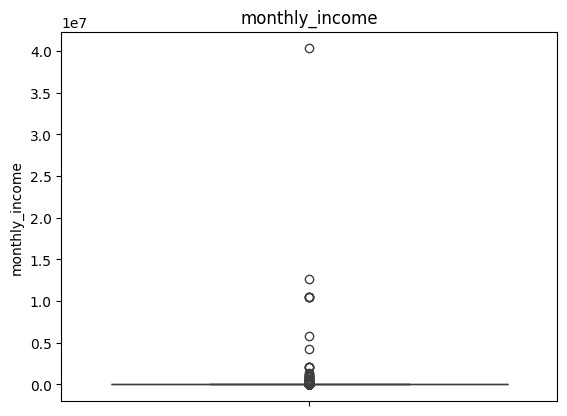

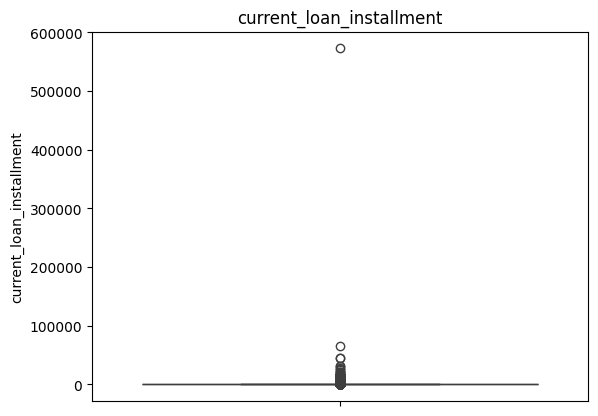

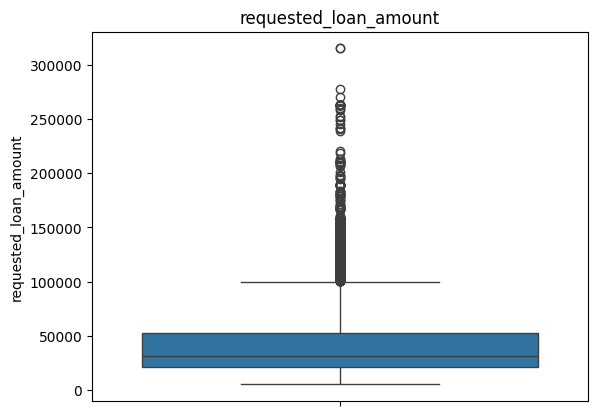

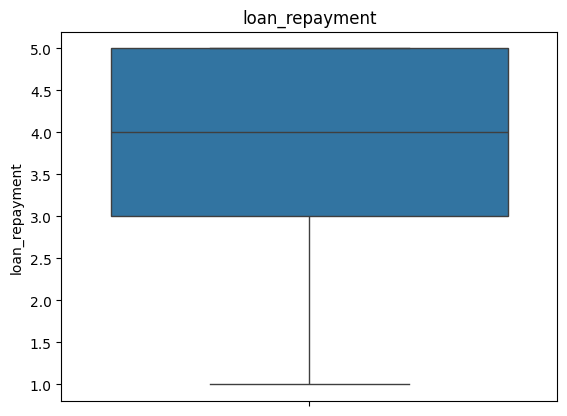

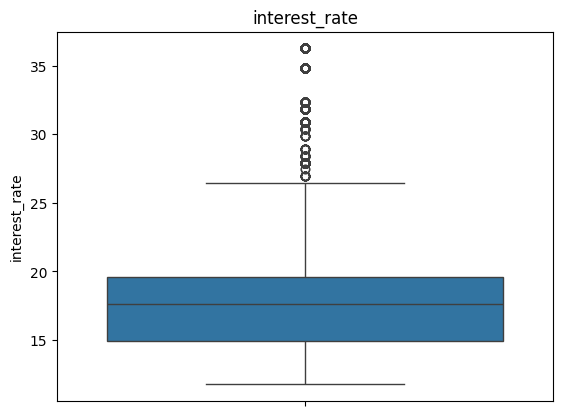

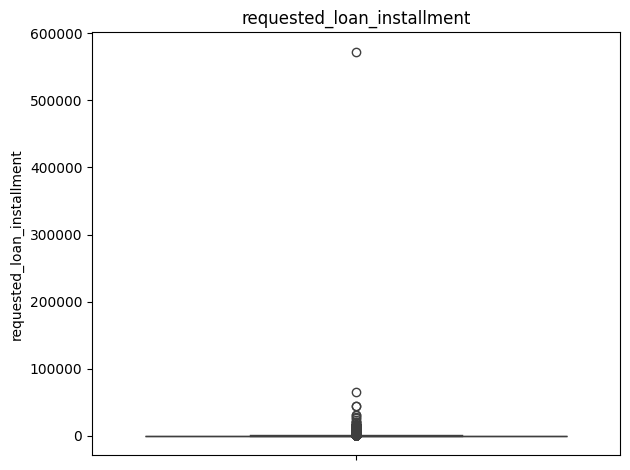

In [14]:
# Boxplot - numerical columns
for col in nums:
    plt.figure()  
    sns.boxplot(df_train[col]) 
    plt.title(col) 

plt.tight_layout() 
plt.show()

##### From the boxplot, we can see that extreme outliers exist in 'monthly_income', 'current_loan_installment', 'requested_loan_installment' columns which squeezes the boxplot.

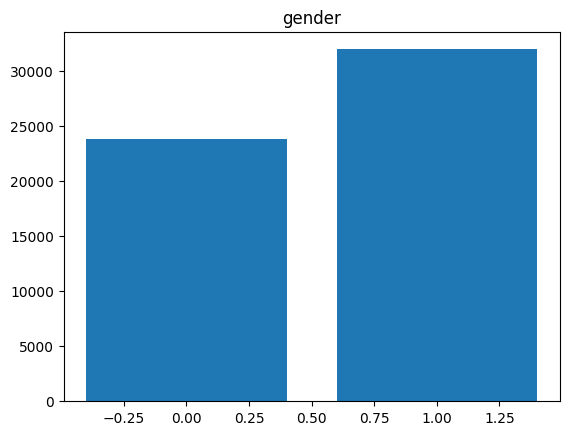

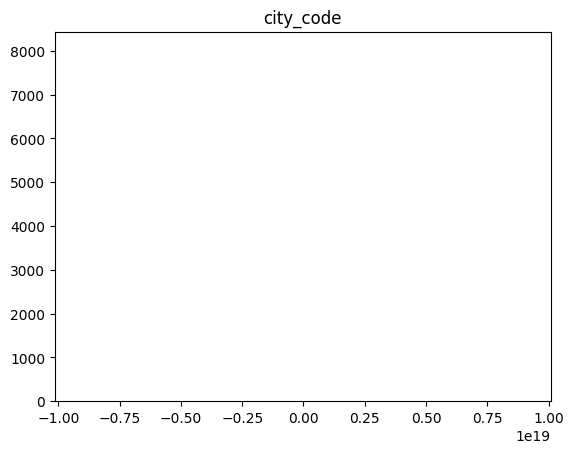

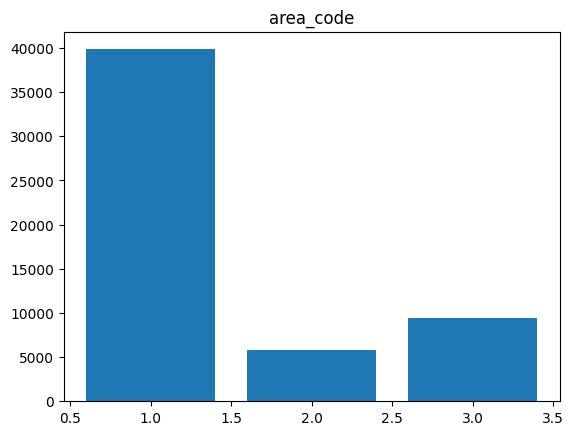

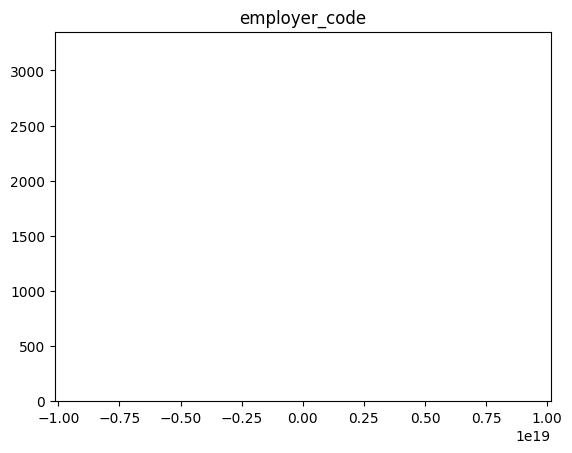

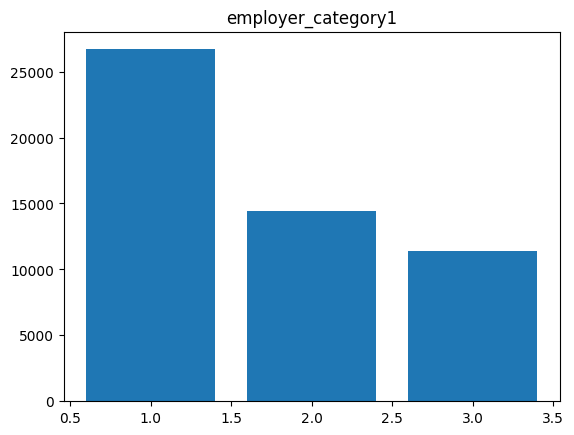

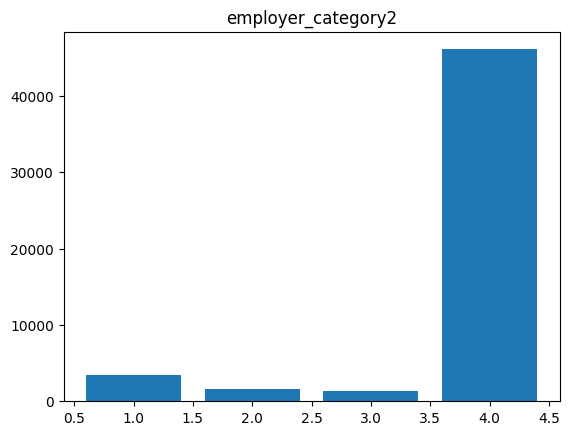

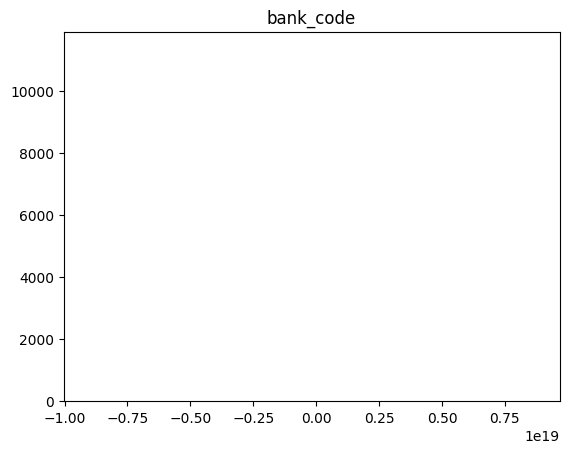

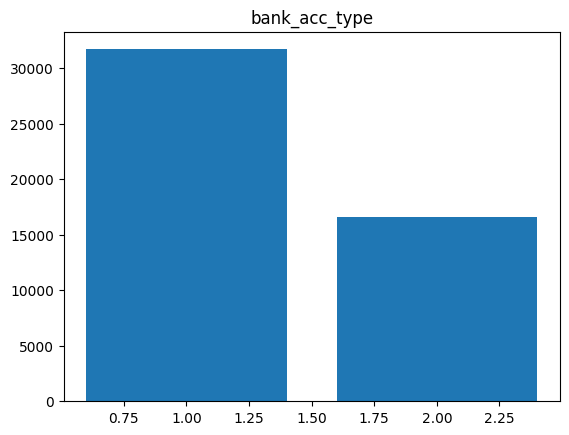

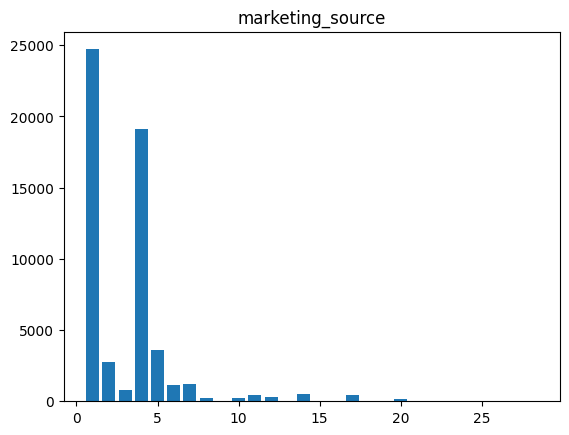

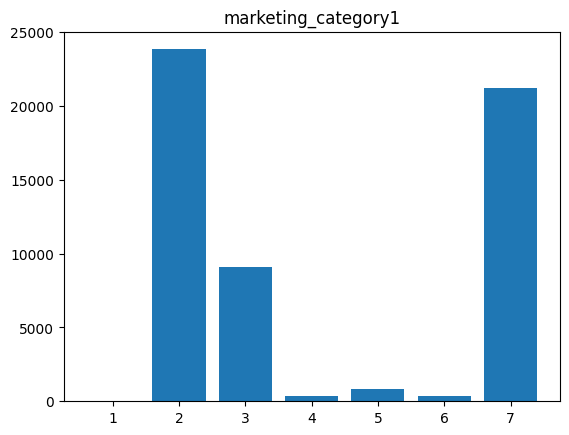

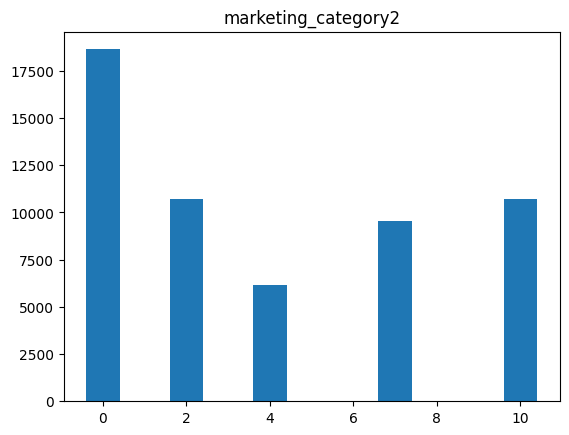

In [15]:
for col in cats:
    fig, ax = plt.subplots()
    ax.bar(df_train[col].value_counts().index, df_train[col].value_counts())
    ax.set_title(col) 

<Axes: >

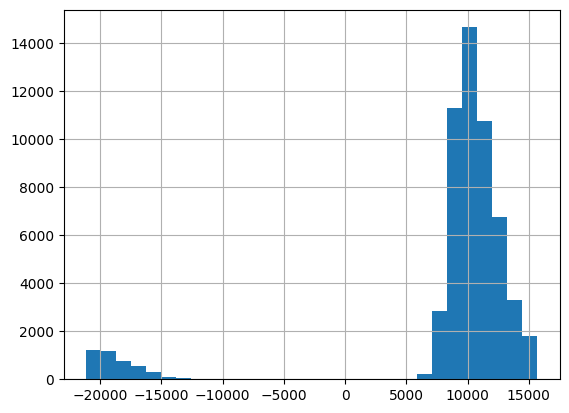

In [16]:
# Create 'age_days' column using the 'dob' & 'lead_creation_date' column to see the age distribution of the customers
df_train['age_days'] = (df_train['lead_creation_date'] - df_train['dob']) / np.timedelta64(1, 'D')
df_test['age_days'] = (df_test['lead_creation_date'] - df_test['dob']) / np.timedelta64(1, 'D')

df_train['age_days'].hist(bins=30)

<Axes: >

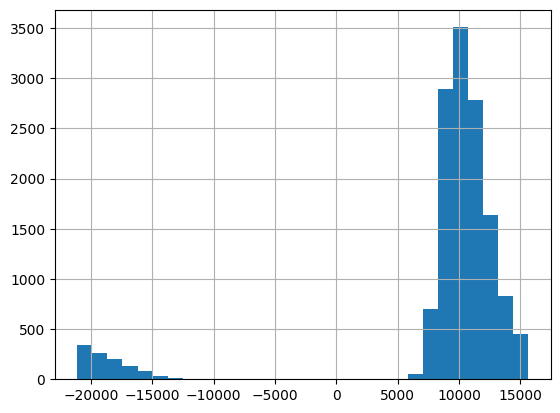

In [17]:
df_test['age_days'].hist(bins=30)

##### Since there is negative value in 'age_days' for both train and test datasets, it is definitely impossible. 
##### Let's see the proportion of negative value in 'age_days' in the dataset.

In [18]:
df_train['TF'] = np.where(df_train['age_days'] < 0, 1, 0)
df_train['TF'].value_counts()

TF
0    51598
1     4162
Name: count, dtype: int64

In [19]:
# Check the proportions of the negative value in 'age_days'
df_train['TF'].value_counts(normalize=True)

TF
0    0.925359
1    0.074641
Name: proportion, dtype: float64

##### In train dataset, there are 4162 rows out of 55760 rows having negative values in 'age_days' column, which is 0.0746% of the data (relatively small).
##### Therefore, we can remove it from the training dataset.

In [20]:
# Check the distribution of 0 and 1 in the target variable: loan_approval_status
df_train['loan_approval_status'].value_counts()

loan_approval_status
0    54916
1      844
Name: count, dtype: int64

In [21]:
# Check the proportions of the target variable
df_train['loan_approval_status'].value_counts(normalize=True)

loan_approval_status
0    0.984864
1    0.015136
Name: proportion, dtype: float64

##### There are only 844 customers (1.5%) have their loan approved in the train dataset. 
##### It indicates that the proportion of the target variable: loan_approval_status that we are interested to predict as 1 is extremely small as compared to 0.
##### This is an extremely imbalanced classification problem.

In [22]:
# Separate features and the target variable
df_train_x = df_train.drop(['dob', 'lead_creation_date', 'age_days', 'TF', 'loan_approval_status'], axis=1)
df_train_y = df_train[['loan_approval_status']]

# Fill missing values in all columns with -9999
df_train_x_filled = df_train_x.fillna(-9999)

##### Let's check the correlation of the variables against each other.
##### Pandas corr method is used and Spearman correlation is calculated because we are interested in understanding the non-linear relationships.

In [23]:
df_train_corr = pd.concat([df_train_x, df_train_y], axis=1)

# Calculate correlations between variables
corr = df_train_corr.corr(method='spearman')

In [24]:
# Heatmap of the correlation values
import plotly.express as px

fig = px.imshow(corr, text_auto='.3f', color_continuous_scale='RdBu_r', color_continuous_midpoint=0, aspect='auto')
fig.show()

In [ ]:
'''
Insights
1. 'current_loan_installment' and 'requested_loan_installment' have perfect correlation value of 1 due to having same values in both columns as proven before.
2. 'marketing_category_2' is positively correlated with 'monthly_income' (0.675), 
    positively correlated with 'gender' (0.495) and 
    negatively correlated with interest_rate (-0.618). 
    This may indicates that 'marketing_category_2' is for a specific gender customer that has high income and the loan being offered in low interest rate.
3. 'marketing_category_2', 'monthly_income', 'interest_rate' and 'gender' have the highest correlation values vs 'loan_approval_status' as compared to others. 
    These variables may be potentially important features in training the model.
'''

##### Other than correlations, let's calculate the Mutual Information.
##### We can know how much a variable depends on the other, enabling us to gauge the predictive power of the variables vs the target.

##### The higher the value, the more mutually dependent the variable pairs are.

In [25]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information for each feature versus the target variable
mi = mutual_info_classif(df_train_x_filled, df_train_y, random_state=2308)

c:\Users\Leong Pit Khien\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [26]:
res = {}
for i, j in zip(df_train_x_filled.columns, mi):
    res[i] = j
    
df_res = pd.DataFrame.from_dict(res, columns=['mutual_info'], orient='index')

df_res.sort_values(by='mutual_info', ascending=False)

,mutual_info
interest_rate,0.015053
gender,0.010402
monthly_income,0.009865
marketing_category2,0.008799
loan_repayment,0.006854
requested_loan_amount,0.004473
marketing_source,0.004459
marketing_category1,0.004118
bank_code,0.003853
bank_acc_type,0.003302


In [ ]:
'''
The top 4 variables found in Correlation are also the top in Mutual Information. 
'''